In [1]:
#dataset Link : https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS


In [3]:
df = pd.read_csv('../datasets/penguins.csv')

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
df.shape

(344, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [7]:
penguins_df = df.dropna()

In [8]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
penguins_df = pd.get_dummies(penguins_df)
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,1,0
340,46.8,14.3,215.0,4850.0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,1,0


In [10]:
penguins_df = penguins_df.drop('sex_.',axis=1)
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X, columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.897723,0.777263,-0.126893,-0.572233,-0.985184,0.991085
1,-0.824265,0.117037,-0.107872,-0.509923,1.015038,-1.008996
2,-0.677349,0.421757,-0.073633,-1.195338,1.015038,-1.008996
3,-1.338472,1.081983,-0.081242,-0.946096,1.015038,-1.008996
4,-0.860994,1.742210,-0.092655,-0.696854,-0.985184,0.991085
5,-0.934452,0.320183,-0.126893,-0.728010,1.015038,-1.008996
6,-0.879359,1.234343,-0.073633,0.580511,-0.985184,0.991085
7,-0.365152,1.539063,18.206039,0.050871,-0.985184,0.991085
8,-0.530433,0.218610,-0.123089,-1.257649,1.015038,-1.008996
9,-0.989546,2.046930,-0.088850,-0.509923,-0.985184,0.991085


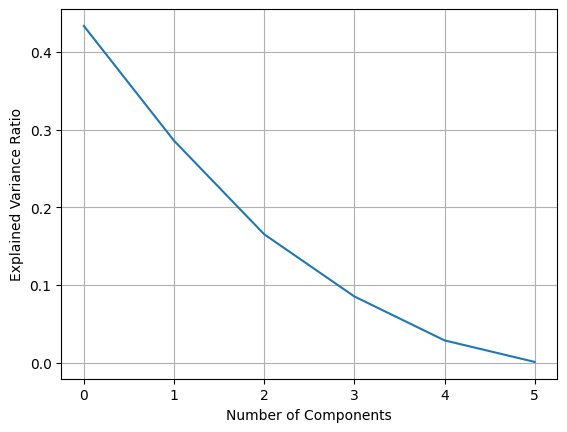

In [12]:
# Create a PCA object with a large number of components
pca = PCA(n_components=penguins_preprocessed.shape[1])  # Set to match or exceed feature count

# Fit the PCA object on the data
pca.fit(penguins_preprocessed)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [13]:
# deternine the number of clusters
pca = PCA(n_components=2)
PCA_penguin = pca.fit_transform(penguins_preprocessed)

DBSCAN completed in 0.01 seconds


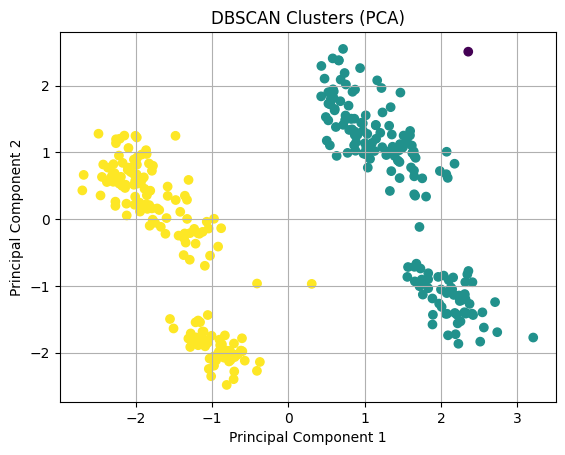

In [14]:
from sklearn.cluster import DBSCAN

# Define DBSCAN parameters (adjust eps and min_samples as needed)
eps = 1  # Maximum distance between points to be considered core points
min_samples = 5  # Minimum number of points to form a cluster

# Create a DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

start_time = time.time()

# Fit the DBSCAN model to the PCA-transformed data
dbscan.fit(PCA_penguin)

elapsed_time = time.time() - start_time
print("DBSCAN completed in {:.2f} seconds".format(elapsed_time))

# Get cluster labels
cluster_labels = dbscan.labels_

# Plot the clusters
plt.scatter(PCA_penguin[:, 0], PCA_penguin[:, 1], c=cluster_labels, cmap="viridis")  # Use PCA components for x and y
plt.title('DBSCAN Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Agglomerative Hierarchy clustering completed in 0.01 seconds


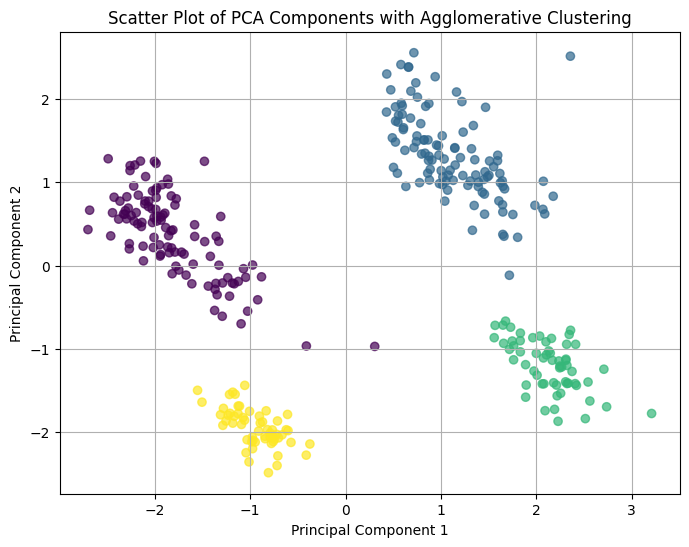

In [15]:
from sklearn.cluster import AgglomerativeClustering

start_time = time.time()

# Agglomerative hierarchical clustering
ward_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(PCA_penguin)
elapsed_time = time.time() - start_time
print("Agglomerative Hierarchy clustering completed in {:.2f} seconds".format(elapsed_time))

cluster_labels = ward_clustering.labels_


# Prepare data for scatter plot with colors based on clusters
df_scatter = pd.DataFrame({'PC1': PCA_penguin[:, 0],
                           'PC2': PCA_penguin[:, 1],
                           'cluster': cluster_labels})

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_scatter['PC1'], df_scatter['PC2'], c=cluster_labels,cmap="viridis", alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components with Agglomerative Clustering')
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Divisive Hierarchy clustering completed in 0.60 seconds


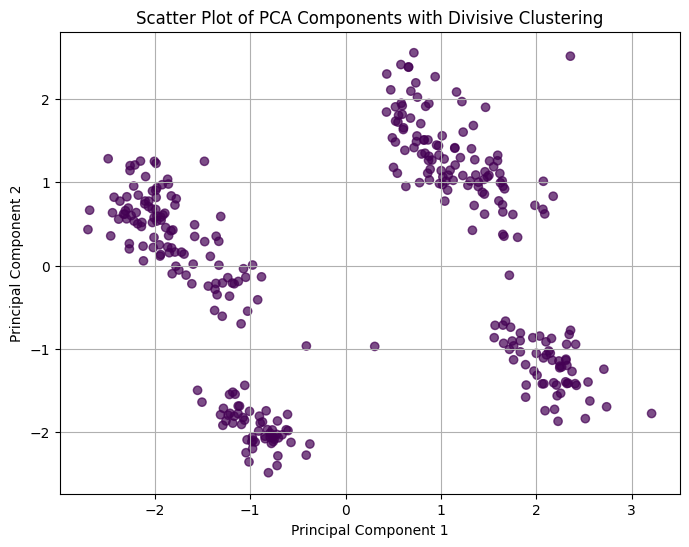

In [16]:
#sckit learn dont have direct implementation of divisive_clustering
# Recursive function to apply divisive clustering
def divisive_clustering(data, n_clusters):
    if n_clusters == 1:
        return [0] * len(data)  # If only one cluster, assign all data points to it
    
    # Apply KMeans to split the data into 2 clusters
    kmeans = KMeans(n_clusters=2)
    labels = kmeans.fit_predict(data)
    
    # Recursively apply divisive clustering to the resulting clusters
    current_label = max(labels) + 1
    for cluster in range(2):
        cluster_indices = [i for i, label in enumerate(labels) if label == cluster]
        if len(cluster_indices) > 1:  # Proceed only if the cluster has more than one point
            new_labels = divisive_clustering(data[cluster_indices], n_clusters - 1)
            for i, idx in enumerate(cluster_indices):
                labels[idx] = current_label + new_labels[i]
    
    return labels

start_time = time.time()

# Divisive hierarchical clustering
n_clusters = 4
cluster_labels = divisive_clustering(PCA_penguin, n_clusters)

elapsed_time = time.time() - start_time
print("Divisive Hierarchy clustering completed in {:.2f} seconds".format(elapsed_time))

# Prepare data for scatter plot with colors based on clusters
df_scatter = pd.DataFrame({'PC1': PCA_penguin[:, 0],
                           'PC2': PCA_penguin[:, 1],
                           'cluster': cluster_labels})

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_scatter['PC1'], df_scatter['PC2'], c=cluster_labels, cmap="viridis", alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components with Divisive Clustering')
plt.grid(True)
plt.show()


OPTICS completed in 0.34 seconds


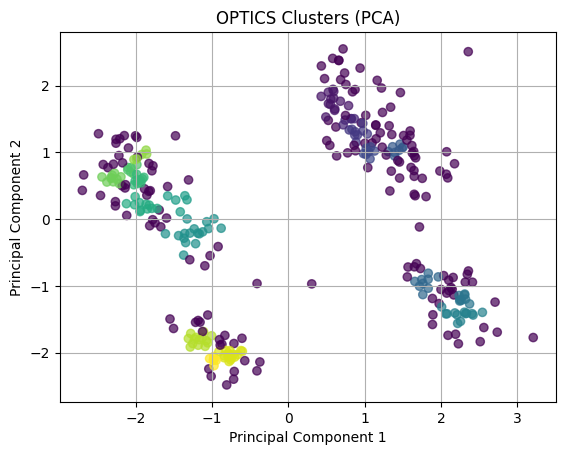

In [17]:

# Define OPTICS parameters (adjust min_samples and max_eps as needed)
min_samples = 5  # Minimum number of points to form a cluster
max_eps = 2  # The maximum distance between two samples to be considered in a cluster (optional)

# Create an OPTICS model
optics = OPTICS(min_samples=min_samples, max_eps=max_eps)

start_time = time.time()

# Fit the OPTICS model to the PCA-transformed data
optics.fit(PCA_penguin)

elapsed_time = time.time() - start_time
print("OPTICS completed in {:.2f} seconds".format(elapsed_time))

# Get cluster labels (-1 denotes noise points)
cluster_labels = optics.labels_

# Plot the clusters
plt.scatter(PCA_penguin[:, 0], PCA_penguin[:, 1], c=cluster_labels, cmap="viridis", alpha=0.7)  # Use PCA components for x and y
plt.title('OPTICS Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
